# Linear Regression
You should build a machine learning pipeline using a linear regression model. In particular, you should do the following:
- Load the `housing` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a linear regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## Step 0: import the specific packages

In [1]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
# import sklearn.svm
import sklearn.metrics
import sklearn.linear_model

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Load the .csv file

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [3]:
df['stories.1'].unique()

array([1, 0])

In [4]:
df['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [5]:
df['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [6]:
df = df.drop(['stories.1','prefarea'], axis = 1)

## Step 2: Splitting the Dataset

In [7]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

print ('df size: ', df.shape)
print ('df_train size: ', df_train.shape)
print ('df_test size: ', df_test.shape)

df size:  (545, 12)
df_train size:  (408, 12)
df_test size:  (137, 12)


# Data Preprocessing and Feature Engineering

## Step 3: Identify the implicit missing values of attributes and replace them with an explicit missing value

In [8]:
df_train.dtypes

id                    int64
price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
furnishingstatus    float64
dtype: object

## Step 3.1: Checking for Null or NaN in the Dataset

In [9]:
df_train.isnull().sum()

id                  0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [10]:
df_train.isna().sum()

id                  0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

## Step 3.2: Check every column for possible implicit values

bedrooms
3    229
2     97
4     71
5      8
6      2
1      1
Name: count, dtype: int64


<Axes: xlabel='bedrooms'>

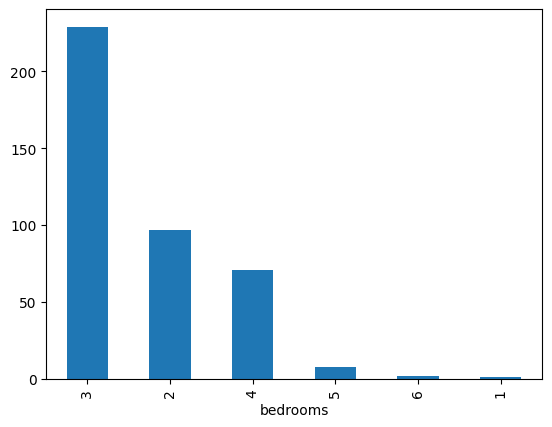

In [11]:
print (df_train['bedrooms'].value_counts())
df_train['bedrooms'].value_counts().plot(kind = 'bar')

bathrooms
1    297
2    103
3      7
4      1
Name: count, dtype: int64


<Axes: xlabel='bathrooms'>

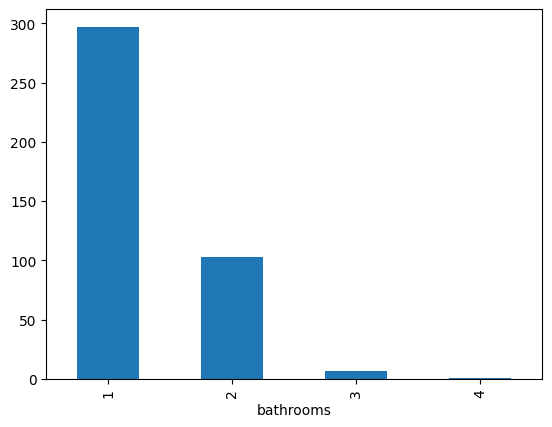

In [12]:
print (df_train['bathrooms'].value_counts())
df_train['bathrooms'].value_counts().plot(kind = 'bar')

## Try to do the same thing for all of the columns... There has to be an easier way.

## Step 4: Now we use the df_train

In [13]:
x_train = df_train.drop(['id','price'], axis = 1)
y_train = df_train['price']

x_test = df_test.drop(['id','price'], axis = 1)
y_test = df_test['price']

print ('x_train size: ', x_train.shape)
print ('y_train size: ', y_train.shape)
print ('x_test size: ', x_test.shape)
print ('y_test size: ', y_test.shape)

x_train size:  (408, 10)
y_train size:  (408,)
x_test size:  (137, 10)
y_test size:  (137,)


In [14]:
# numerical_attributes = x_train.select_dtypes(include = ['int64','float64']).columns.tolist()

# ct = sklearn.compose.ColumnTransformer([
#     ('standard_scaling', sklearn.preprocessing.StandardScaler(), numerical_attributes)
# ])

# ct.fit(x_train)
# x_train = ct.transform(x_train)
# x_test = ct.transform(x_test)

# print ('x_train size: ', x_train.shape)
# print ('y_train size: ', y_train.shape)
# print ('x_test size: ', x_test.shape)
# print ('y_test size: ', y_test.shape)

In [28]:
# model = sklearn.svm.SVR()
model1 = sklearn.linear_model.LinearRegression() # We should use the linear regression model
model1.fit(x_train, y_train)
model2 = sklearn.linear_model.LogisticRegression()
model2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 6: Model Assessment

In [16]:
y_predicted = model1.predict(x_test)
Mean_sq_err = sklearn.metrics.mean_squared_error(y_test, y_predicted)

print(Mean_sq_err) # Test the Mean squared error between the different models, the one who has the smallest m_s_error is better

1021371667270.1697


In [29]:
y_predicted2 = model2.predict(x_test)
accuracy2 = sklearn.metrics.accuracy_score(y_test, y_predicted2)

print(accuracy2)

0.051094890510948905


Text(0.5, 0, 'Actual Price')

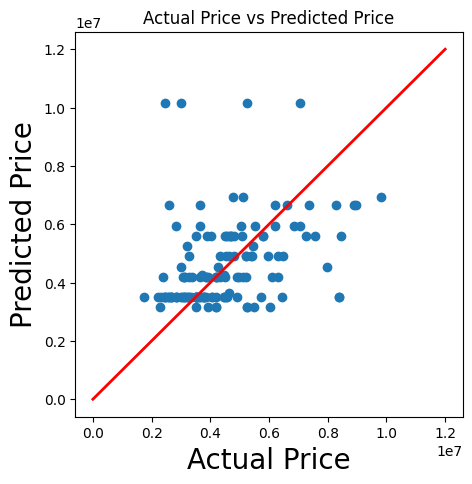

In [32]:
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_predicted2)
plt.plot([0,12000000], [0,12000000], color = 'red', linestyle = '-', linewidth = 2)
plt.title('Actual Price vs Predicted Price')

plt.ylabel('Predicted Price', size = 20)
plt.xlabel('Actual Price', size = 20)

# Now We delve deeper and take a look at what the model is taking into account to make the prediction using the XAI, such as SHAP values...

# SHAP: Shapley Additive exPlanation

## Importing necessary modules and packages

In [18]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 21.2 MB/s eta 0:00:00


In [19]:
import shap
shap.initjs() #Allows to initialize the package and display the SHAP plots

### Showing SHAP's Waterfall graph

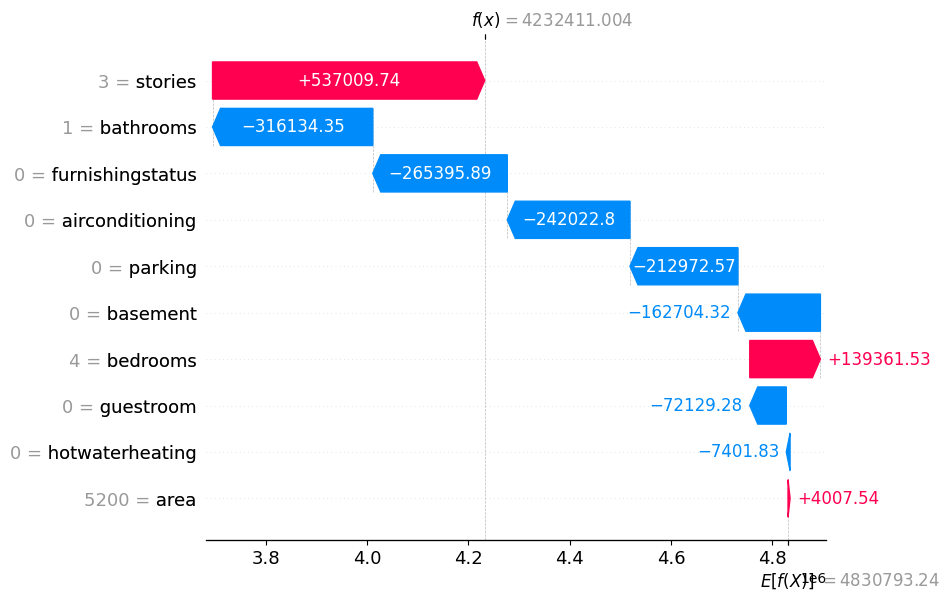

In [35]:
explainer = shap.LinearExplainer(model1, x_train)
shap_values = explainer(x_test)
shap.plots.waterfall(shap_values[42], max_display = 12)

### SHAP's Force graph

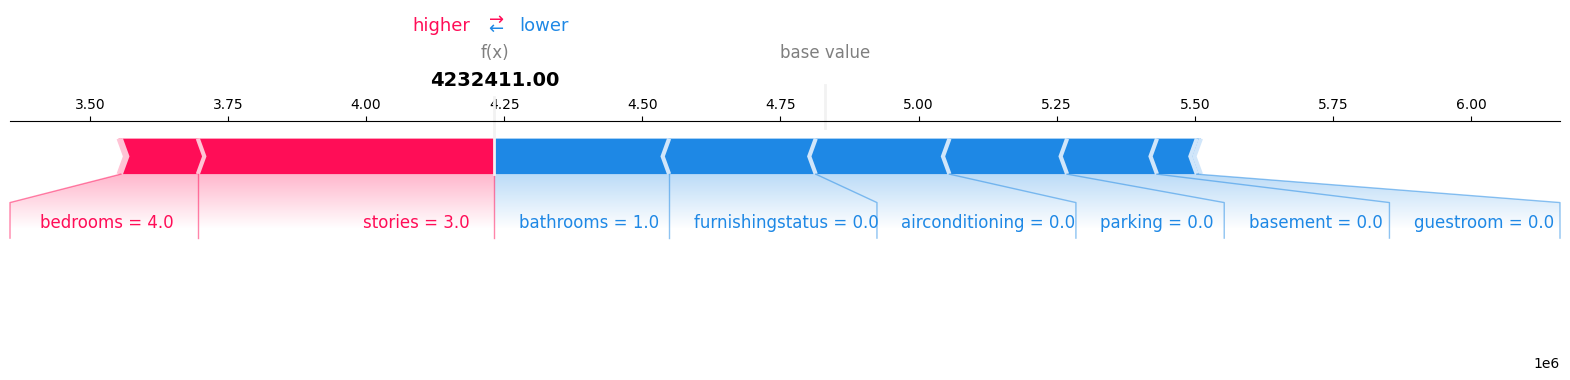

In [21]:
shap.plots.force(shap_values[42], matplotlib= True)

### SHAP's Beeswarm graph

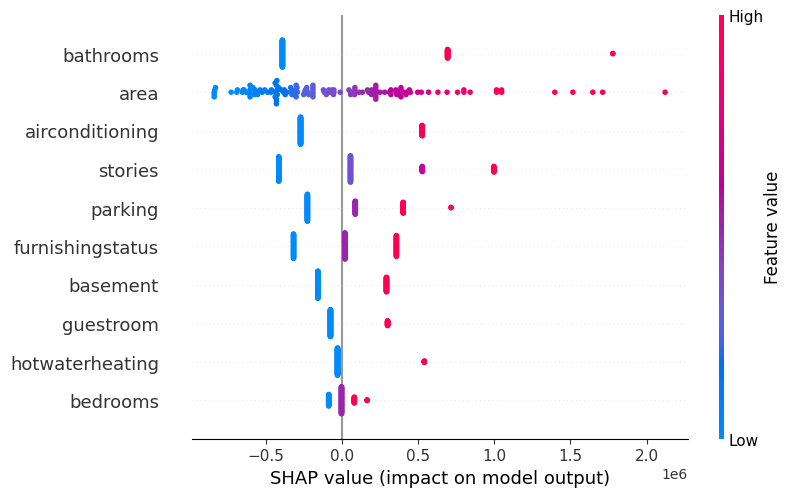

In [22]:
shap.plots.beeswarm(shap_values)

### SHAP's Heatmap

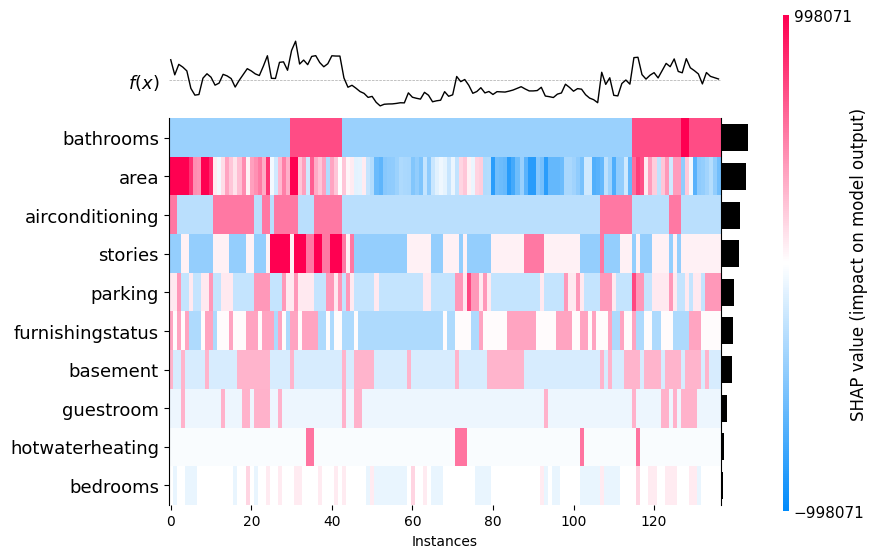

<Axes: xlabel='Instances'>

In [23]:
shap.plots.heatmap(shap_values)

# LIME: Local Interpretable Model-agnostic Explainer

## Importing necessary modules and packages

In [24]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a55be869a57585c29c841c757c72b476b00214e0c54f1d0a809b2397a175cd26
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [25]:
import lime
import lime.lime_tabular

### Showing Lime_Tabular

In [26]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names = x_train.columns,
                                                   mode = 'regression')
exp = explainer.explain_instance(x_test.values[7], model1.predict, num_features = 10)
exp.show_in_notebook(show_all = False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
print(y_test.max())
print(y_test.min())
print(10*'#')
print(y_predicted.max())
print(y_predicted.min())
print(y_predicted[42])


9800000
1750000
##########
8993880.967717446
2302806.612464054
4232411.003920227
